In [300]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [301]:
%matplotlib inline

In [302]:
ssc = SQLContext(sc)
tweets = ssc.read.parquet("/tmp/tweet-corpus")
tweets.cache()

DataFrame[_1: array<string>, _2: double]

In [303]:
tweets.count()

5003

In [304]:
df = tweets.toPandas()
df.head()

,_1,_2
0,"[, the case, be the, would be, feel, we had, w...",1
1,"[, satu, tapii, kan, cuma, jam sama, handshak,...",0
2,"[, want, tattoo, want tattoo, i, tattoo , i want]",0
3,"[, maybe, yeah maybe, rawr yeah, rawr, know, k...",0
4,"[, ay grabe, grabe, , usernam ay, usernam, ay]",0


## Preprocessing

### Using `HashingTF`, a simple bag of words model

In [305]:
from pyspark.mllib.feature import IDF
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.classification import LabeledPoint

In [307]:
coeff = 1500
hashingTf = HashingTF(coeff)

In [308]:
#vectors = sc.parallelize([hashingTf.transform(tokens) for tokens in df._1])
#idf = IDF().fit(vectors)
def featurize(tokens): return hashingTf.transform(tokens)
#def tfidf(tokens): return idf.transform(tf(tokens))

In [309]:
df['lpoint'] = df.apply(lambda row: LabeledPoint(row['_2'], featurize(row['_1'])), axis=1)
df

,_1,_2,lpoint
0,"[, the case, be the, would be, feel, we had, w...",1,"(1.0,(1500,[0,79,91,189,241,242,344,446,490,65..."
1,"[, satu, tapii, kan, cuma, jam sama, handshak,...",0,"(0.0,(1500,[0,13,58,74,135,181,203,210,236,239..."
2,"[, want, tattoo, want tattoo, i, tattoo , i want]",0,"(0.0,(1500,[0,186,403,438,685,1122,1424],[1.0,..."
3,"[, maybe, yeah maybe, rawr yeah, rawr, know, k...",0,"(0.0,(1500,[0,116,249,437,675,987,1142,1148,12..."
4,"[, ay grabe, grabe, , usernam ay, usernam, ay]",0,"(0.0,(1500,[0,209,333,960,1216,1321,1454],[1.0..."
5,"[, aqui, calor aqui, sempr, tem, calor, aqui s...",0,"(0.0,(1500,[0,135,269,274,276,889,960,1210,121..."
6,"[, usernam usernam, want, him, i, same, i want...",0,"(0.0,(1500,[0,185,254,403,438,539,615,695,725,..."
7,"[, 1990 an, an waktu, masih, ngetwitnya, ngetw...",0,"(0.0,(1500,[0,11,69,138,166,252,291,372,405,45..."
8,"[, usernam cant, cant , usernam, cant]",0,"(0.0,(1500,[0,267,1014,1191,1216],[1.0,1.0,1.0..."
9,[],0,"(0.0,(1500,[0],[1.0]))"


Create train/test split

In [310]:
# create boolean mask
msk = np.random.rand(len(df)) < 0.80
train = df[msk]
test = df[~msk]

### Distribution of labels of training set

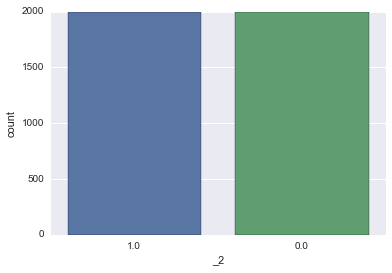

In [311]:
_ = sns.countplot(x="_2", data=train)

### Distribution of labels of test set

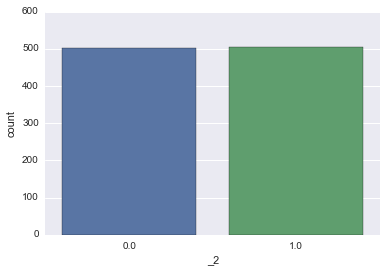

In [312]:
_ = sns.countplot(x="_2", data=test)

### Run PCA

In [313]:
from pyspark.mllib.feature import PCA

In [283]:
df

,_1,_2,lpoint
0,"[, the case, be the, would be, feel, we had, w...",1,"(1.0,(1500,[0,79,91,189,241,242,344,446,490,65..."
1,"[, satu, tapii, kan, cuma, jam sama, handshak,...",0,"(0.0,(1500,[0,13,58,74,135,181,203,210,236,239..."
2,"[, want, tattoo, want tattoo, i, tattoo , i want]",0,"(0.0,(1500,[0,186,403,438,685,1122,1424],[1.0,..."
3,"[, maybe, yeah maybe, rawr yeah, rawr, know, k...",0,"(0.0,(1500,[0,116,249,437,675,987,1142,1148,12..."
4,"[, ay grabe, grabe, , usernam ay, usernam, ay]",0,"(0.0,(1500,[0,209,333,960,1216,1321,1454],[1.0..."
5,"[, aqui, calor aqui, sempr, tem, calor, aqui s...",0,"(0.0,(1500,[0,135,269,274,276,889,960,1210,121..."
6,"[, usernam usernam, want, him, i, same, i want...",0,"(0.0,(1500,[0,185,254,403,438,539,615,695,725,..."
7,"[, 1990 an, an waktu, masih, ngetwitnya, ngetw...",0,"(0.0,(1500,[0,11,69,138,166,252,291,372,405,45..."
8,"[, usernam cant, cant , usernam, cant]",0,"(0.0,(1500,[0,267,1014,1191,1216],[1.0,1.0,1.0..."
9,[],0,"(0.0,(1500,[0],[1.0]))"


In [317]:
lpoints = df['lpoint']
rdd = sc.parallelize(lpoints.map(lambda point: point.features).tolist())
pca = PCA(3).fit(rdd)
df['pca'] = df.apply(lambda row: pca.transform(row['lpoint'].features), axis=1)
df['pca_0'] = df.apply(lambda row: row['pca'][0], axis=1)
df['pca_1'] = df.apply(lambda row: row['pca'][1], axis=1)
df['pca_2'] = df.apply(lambda row: row['pca'][2], axis=1)
viz = df[['_2', 'pca_0', 'pca_1', 'pca_2']]

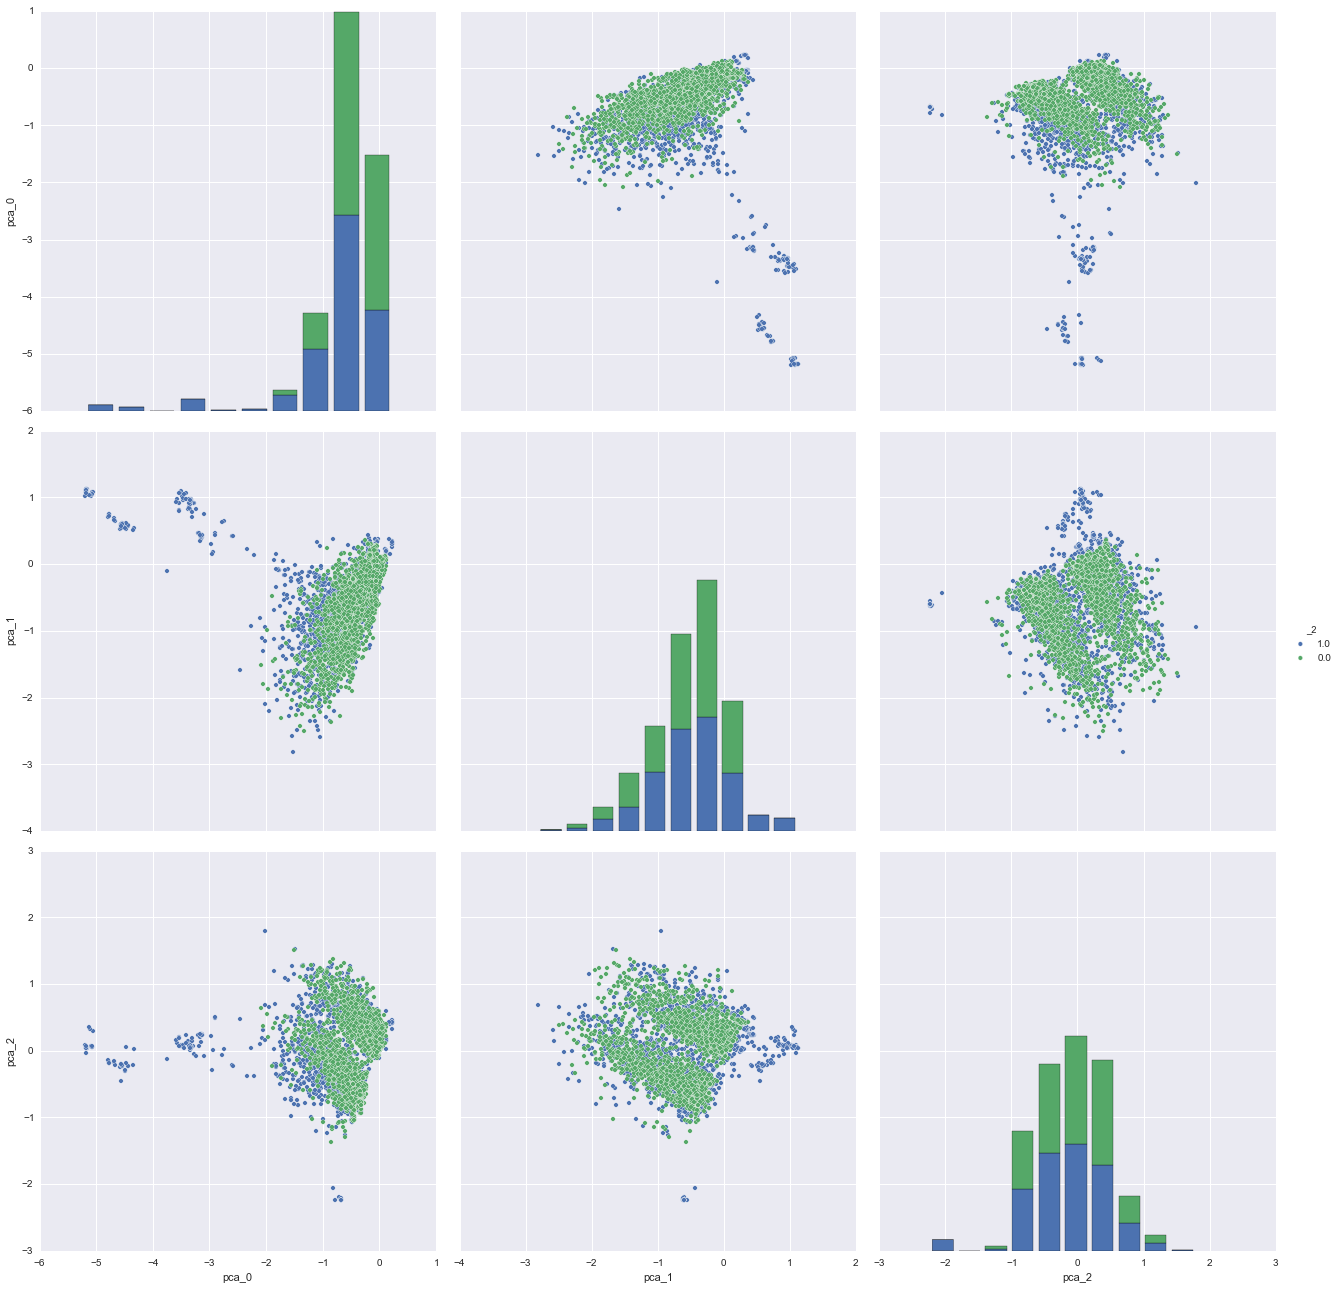

In [318]:
_ = sns.pairplot(viz, vars=['pca_0', 'pca_1', 'pca_2'], hue="_2", size=6.0)

# Train a Logistic Regression classifier

In [319]:
from pyspark.mllib.classification import LogisticRegressionWithSGD
from pyspark.mllib.classification import LabeledPoint

Let's add a new column with `LabeledPoint`s consisting of TF-IDF vectors.

In [320]:
train_rdd = sc.parallelize(train.lpoint)

Now train the logistic regression estimator.

In [321]:
lr = LogisticRegressionWithSGD.train(train_rdd, initialWeights=Vectors.zeros(coeff), iterations=200)

# Test

In [322]:
test['prediction'] = test.apply(lambda row: lr.predict(row['lpoint'].features), axis=1)

/Users/rene/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [323]:
test

,_1,_2,lpoint,prediction
12,"[, realiz im, httpstcoevokfo3e1, oh, god, my g...",0,"(0.0,(1500,[0,12,138,220,271,452,546,602,645,7...",0
15,"[down, , in, sad , slfl, slfl, yall dont, die...",0,"(0.0,(1500,[0,10,82,98,191,237,269,359,444,509...",0
18,"[, ]",0,"(0.0,(1500,[0,1321],[1.0,1.0]))",1
26,"[, lg nyambung, usernam twenti, usernam naik, ...",0,"(0.0,(1500,[0,26,131,150,188,205,361,378,484,5...",1
32,"[want to, , learn , learn, want, cos90rrqiotq,...",0,"(0.0,(1500,[0,65,220,397,403,437,438,674,806,1...",0
38,"[ill text, and see, , if we, we can, wanna com...",0,"(0.0,(1500,[0,24,106,176,196,230,293,308,382,5...",0
43,"[, tangga, maklum pertengkaran, kapan taken, ...",0,"(0.0,(1500,[0,71,162,225,395,481,648,788,801,8...",1
45,"[, usernam nationalstresslif, nationalstressli...",0,"(0.0,(1500,[0,39,185,1158,1216],[1.0,1.0,1.0,1...",0
51,"[, him , still miss, miss him, him, httpst, m...",0,"(0.0,(1500,[0,156,175,274,725,764,775,806,894,...",0
59,"[incident, allah maaf, le, , ya, in, sad incid...",0,"(0.0,(1500,[0,9,17,22,30,207,210,259,278,284,2...",1


# Metrics

In [324]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics

In [325]:
scoreAndLabels = test.apply(lambda row: (float(row['prediction']), row['lpoint'].label), axis=1)
scoreAndLabels = sc.parallelize(scoreAndLabels)

In [326]:
binary_metrics = BinaryClassificationMetrics(scoreAndLabels)

In [327]:
binary_metrics.areaUnderPR

0.7777183043486382

In [328]:
binary_metrics.areaUnderROC

0.7035452903716377

In [329]:
mult_metrics = MulticlassMetrics(scoreAndLabels)

In [330]:
mult_metrics.precision()

0.7034825870646766

In [331]:
mult_metrics.recall()

0.7034825870646766

In [332]:
max(test._2.mean(), 1 - test._2.mean())

0.5014925373134328